#### 사운드 프로세싱
- 진폭(amplitude) A : 위 아래로 움직이는 폭, 소리의 크기로 인식
- 주파수(frequency) f : 진동 속도. 주파수가 높으면 빠르게 진동, 소리의 높낮이로 인식
- 위상(phase) : 사인 함수의 시작 시점, 위상만큼 출발이 늦어짐, 위상 차이는 소리의 시간차로 인식

In [1]:
%matplotlib inline

In [6]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

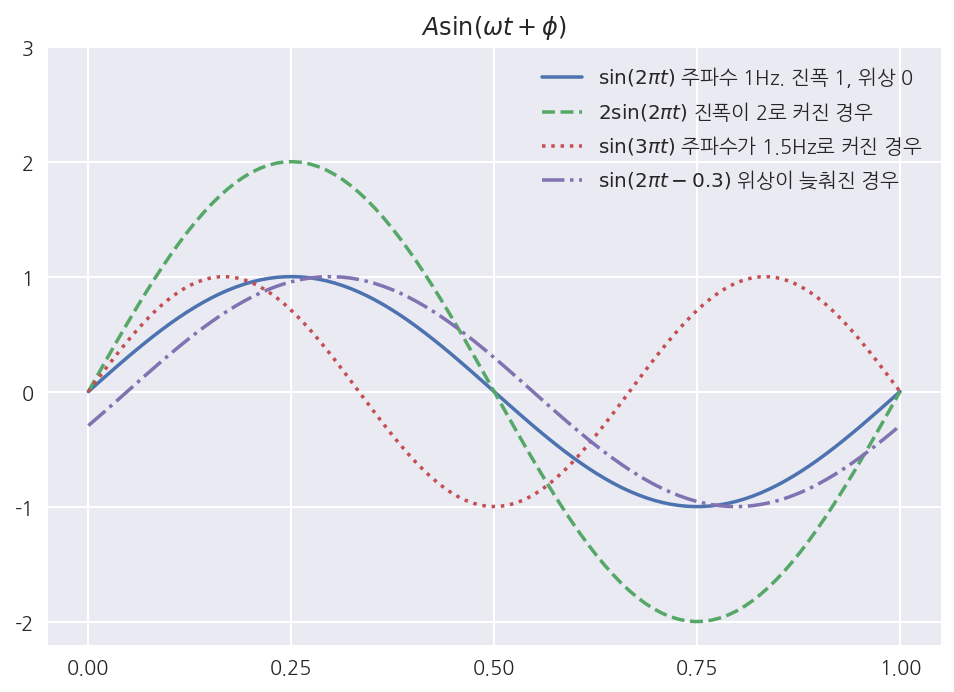

In [3]:
t = np.linspace(0, 1, 100)

plt.plot(t, 1 * np.sin(2 * np.pi * t + 0), ls="-", label=r"$\sin\left(2\pi{t}\right)$ 주파수 1Hz. 진폭 1, 위상 0")
plt.plot(t, 2 * np.sin(2 * np.pi * t + 0), ls="--", label=r"$2\sin\left(2\pi{t}\right)$ 진폭이 2로 커진 경우 ")
plt.plot(t, 1 * np.sin(3 * np.pi * t + 0), ls=":", label=r"$\sin\left(3\pi{t}\right)$ 주파수가 1.5Hz로 커진 경우")
plt.plot(t, 1 * np.sin(2 * np.pi * t - 0.3), ls="-.", label=r"$\sin\left(2\pi{t} - 0.3\right)$ 위상이 늦춰진 경우")
plt.ylim(-2.2, 3)
plt.xticks(np.linspace(0, 1, 5))
plt.legend()
plt.title(r"$A\sin\left(\omega{t}+\phi\right)$")
plt.show()

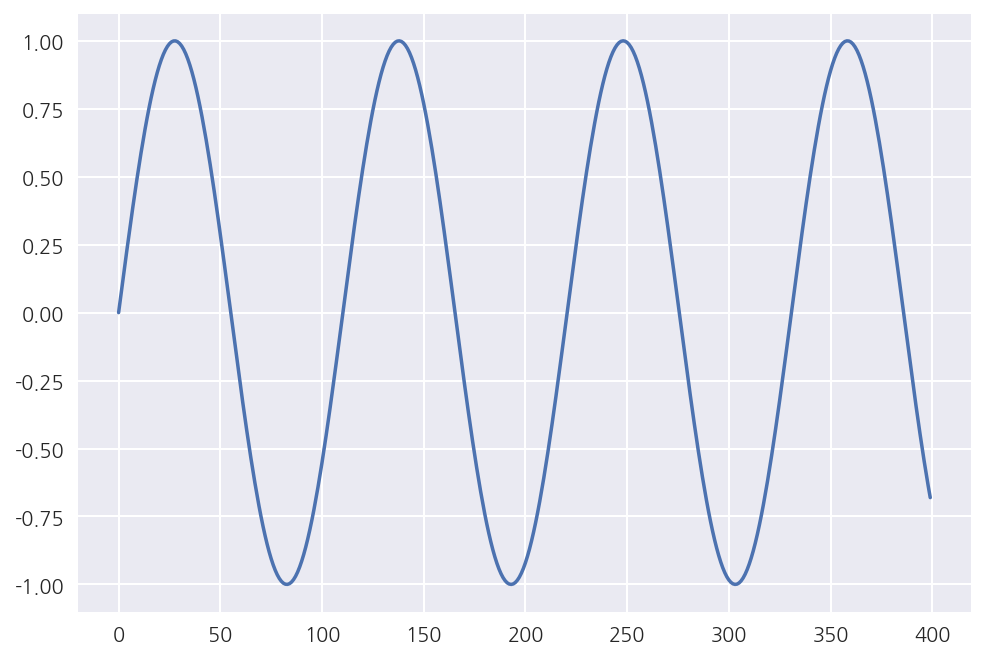

In [5]:
def single_tone(frequecy, sampling_rate=44100, duration=1):
    # frequency: 주파수
    # sampling_rate: 초당 샘플링 데이터 수. 디폴트 44100
    # duration: 지속 시간. 단위 초. 디폴트 1초
    t = np.linspace(0, duration, int(sampling_rate))
    y = np.sin(2 * np.pi * frequecy * t)
    return y

y = single_tone(400)

plt.plot(y[:400])
plt.show()

In [6]:
from IPython.display import Audio, display

display(Audio(y, rate=44100))

In [7]:
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 261.62 * 2**(np.arange(0, len(notes)) / 12.)
notes = list(zip(notes, freqs))
octave = np.hstack([single_tone(f) for f in freqs])
display(Audio(octave, rate=44100))

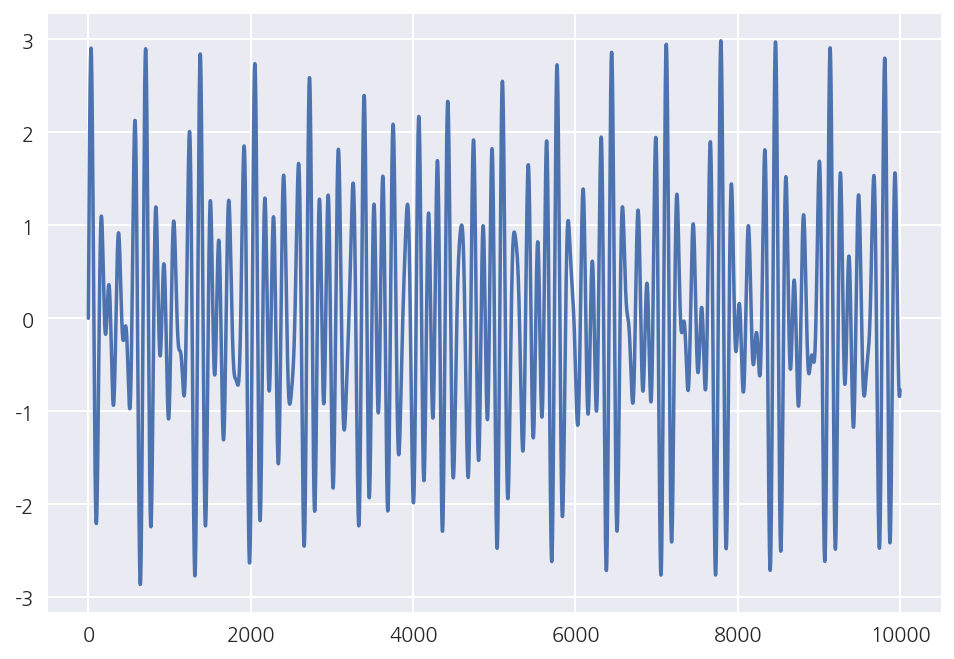

In [8]:
tone_C = single_tone(261.62)
tone_E = single_tone(329.62)
tone_G = single_tone(392)
harmony = tone_C + tone_E + tone_G

plt.plot(harmony[:10000])
plt.show()

In [9]:
display(Audio(harmony, rate=44100))

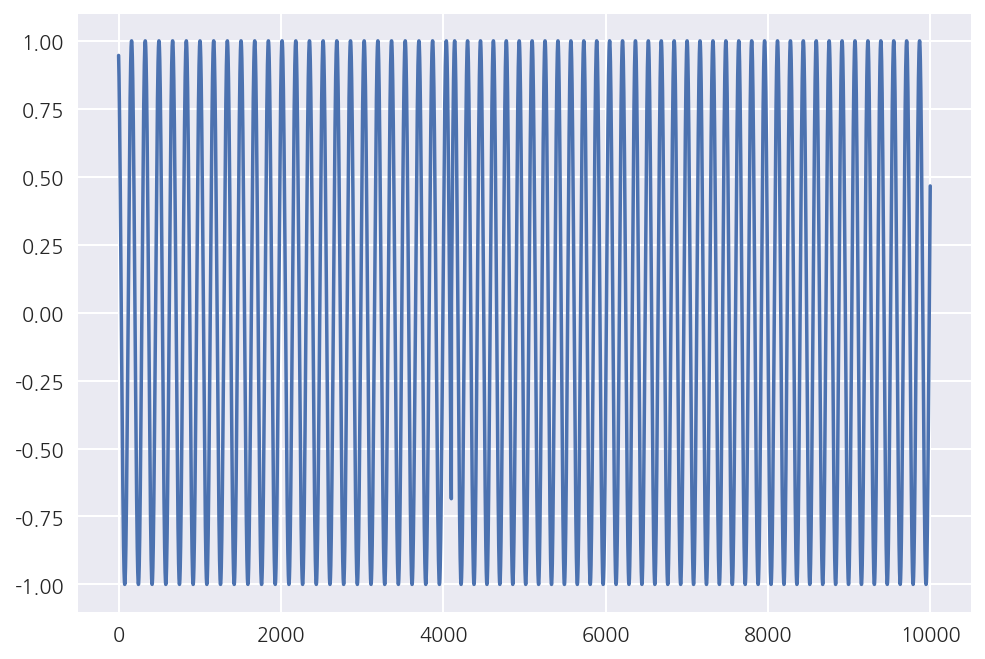

In [10]:
import scipy.io.wavfile

# 초당 샘플링 데이터 수 
sampling_rate = 44100
sp.io.wavfile.write("octave.wav", sampling_rate, octave)

sr, y_read = sp.io.wavfile.read("octave.wav")
# sr == sampling_rate

plt.plot(y_read[40000:50000])
plt.show()

In [11]:
Audio(y_read, rate=sr)

####  지리 정보 데이터 처리

In [2]:
import geopandas as gpd
gpd.__version__

'0.6.3'

In [3]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# 나라는 POLYGON으로 저장
countries.tail(3)

pop_est      continent                 name iso_a3  gdp_md_est  \
174   1895250         Europe               Kosovo    -99     18490.0   
175   1218208  North America  Trinidad and Tobago    TTO     43570.0   
176  13026129         Africa             S. Sudan    SSD     20880.0   

                                              geometry  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...

In [5]:
# 도시는 POINT로 저장
cities.tail()

name                     geometry
197      Cairo    POINT (31.24802 30.05191)
198      Tokyo   POINT (139.74946 35.68696)
199      Paris     POINT (2.33139 48.86864)
200   Santiago  POINT (-70.66899 -33.44807)
201  Singapore    POINT (103.85387 1.29498)

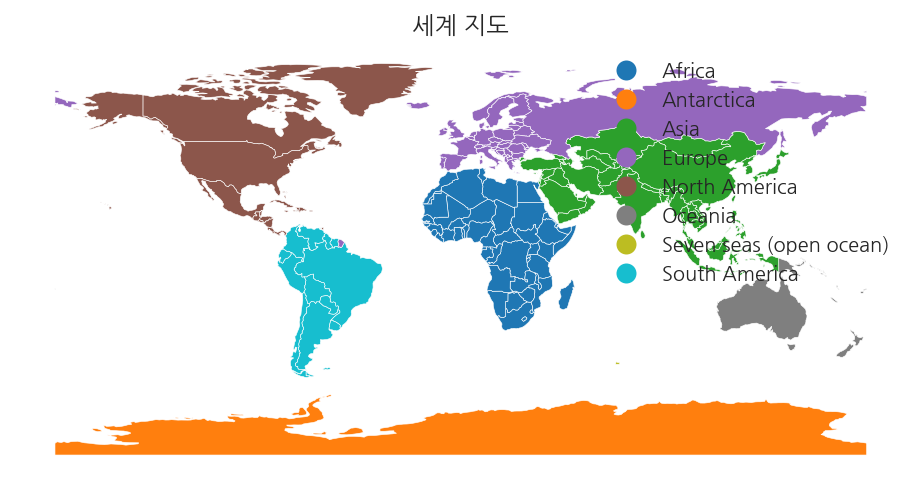

In [7]:
# categorical=True -> 카테고리 데이터
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

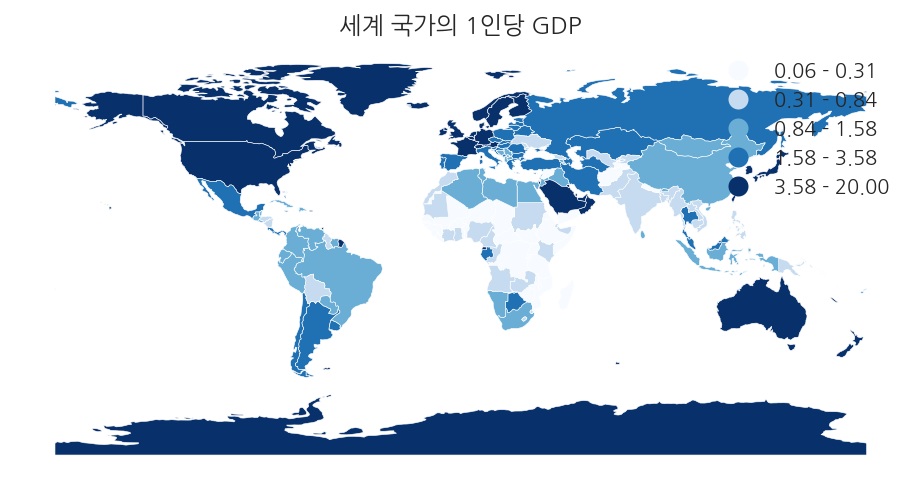

In [9]:
# 1인당 GDP 연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("세계 국가의 1인당 GDP")
plt.show()


##### Polygon
- 한 국가의 영토 따위 등을 여러개의 점을 이은 다각형으로 나타낼수 있음

In [10]:
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

In [11]:
# 여러 개의 점(Point)들로 이루어져있다.
print(countries.geometry[113])

POLYGON ((23.48412763844985 53.91249766704114, 23.527535841575 53.47012156840655, 23.80493493011778 53.08973135030607, 23.79919884613338 52.69109935160657, 23.19949384938619 52.48697744405367, 23.50800215016869 52.02364655212473, 23.52707075368437 51.57845408793031, 24.0299857927489 50.70540660257518, 23.92275719574326 50.42488108987874, 23.42650841644439 50.30850576435745, 22.5184501482116 49.47677358661974, 22.77641889821263 49.02739533140962, 22.55813764821175 49.08573802346714, 21.60780805836421 49.47010732685409, 20.88795535653841 49.32877228453583, 20.41583947111985 49.43145335549977, 19.82502282072687 49.21712535256923, 19.32071251799047 49.57157400165919, 18.90957482267632 49.43584585224458, 18.85314415861362 49.49622976337764, 18.39291385262217 49.98862864847075, 17.64944502123899 50.04903839781996, 17.55456709155112 50.36214590107642, 16.86876915860566 50.47397370055603, 16.71947594571444 50.21574656839354, 16.17625328946227 50.42260732685791, 16.23862674323857 50.69773265237

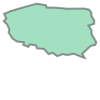

In [12]:
countries.geometry[113]

##### Points
- 어떤 사건이 발생한 위치, 한국가의 수도, 두 국가간의 중앙점 등은 하나의 좌표로 나타냄

In [13]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

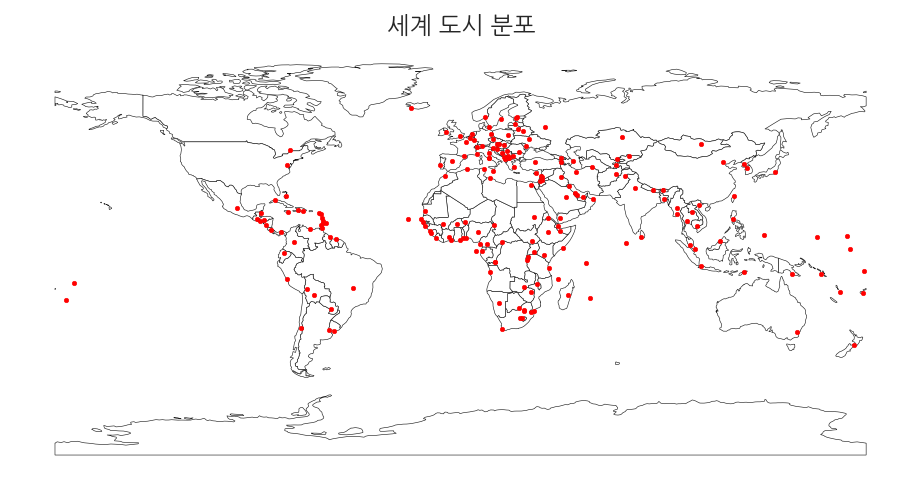

In [14]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("세계 도시 분포")
plt.show()

##### LineString
- 점과 점을 이은 것은 선이 됨
- 두 도시 사이의 길, 강의 흐름, 국경의 생김새, 경계면 정보 등등

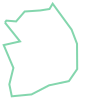

In [19]:
# 우리나라 육지를 선으로 이은 것
korea_border = countries[countries.name == "South Korea"].geometry
korea_border.boundary.squeeze()

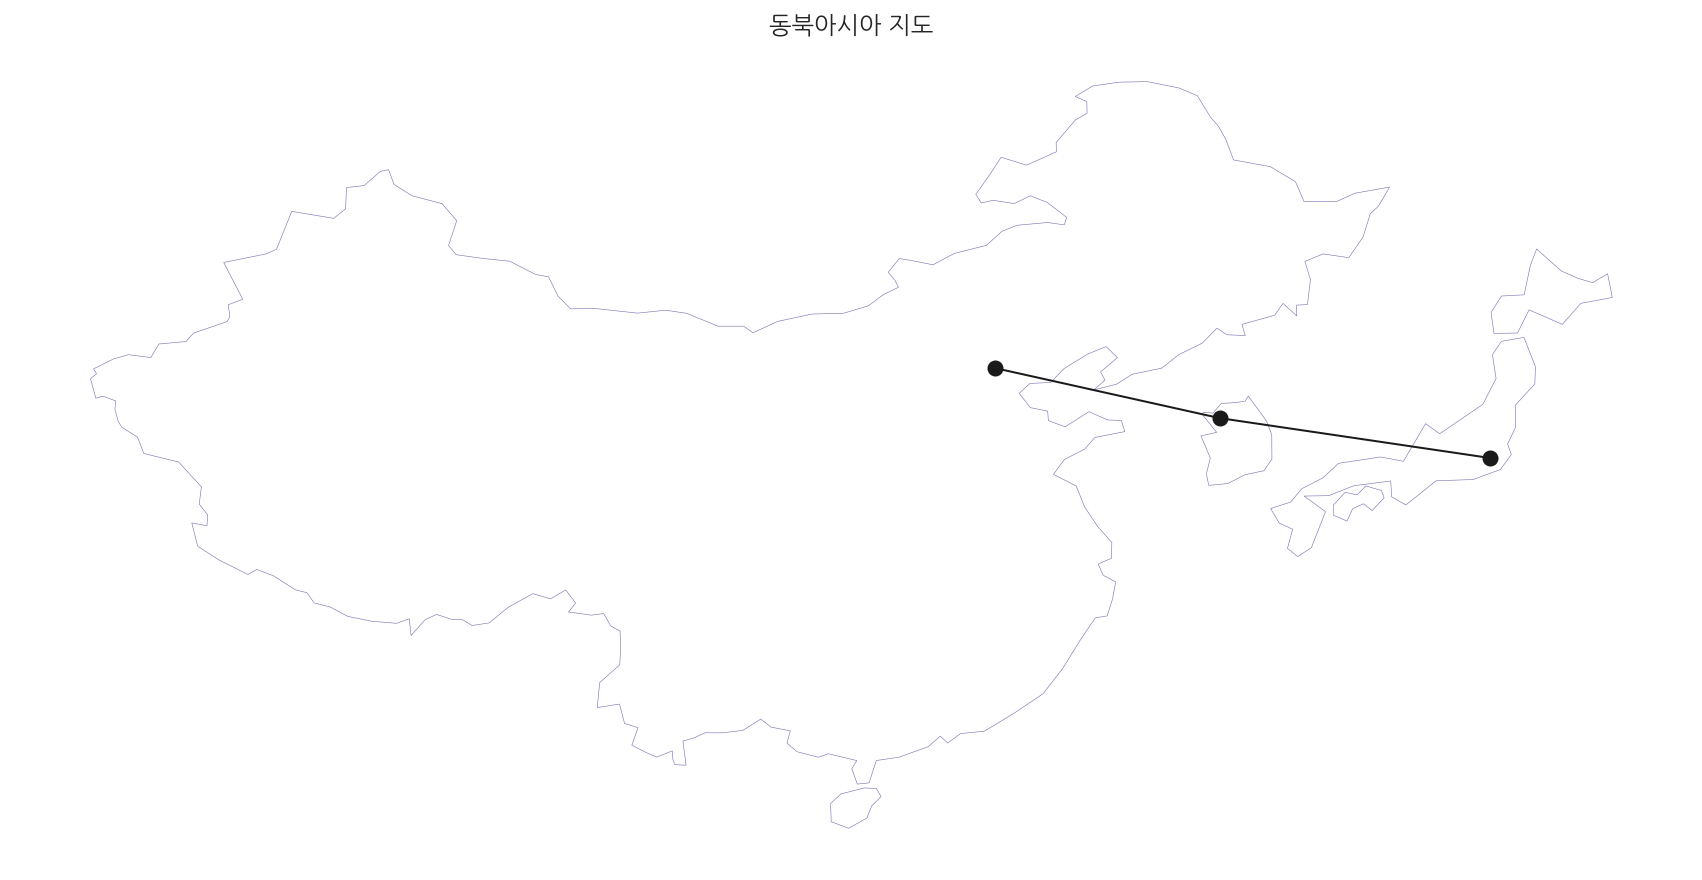

In [20]:
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['South Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m")

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze()
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze()

line = LineString([beijing, seoul, tokyo])

ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("동북아시아 지도")
ax.set_axis_off()
plt.show()

In [25]:
korea = countries.loc[countries['name'] == 'South Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

In [26]:
seoul.within(korea)

True

In [27]:
korea.contains(seoul)

True

In [28]:
china.intersects(korea)

False